## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False   

In [8]:
data = pd.read_csv(r"abnormal_orders.txt")

In [9]:
data.head()

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [10]:
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'abnormal_label'],
      dtype='object')

#### Sample Size

In [11]:
data.shape #排除标签一共有13个特征，13.4w数据

(134190, 14)

#### Explore Features

In [13]:
data["abnormal_label"].value_counts() 

0    105733
1     28457
Name: abnormal_label, dtype: int64

In [14]:
(data["abnormal_label"] == 1).sum()

28457

In [15]:
(data["abnormal_label"] == 1).sum()/data.shape[0] #样本不均衡，但是不均衡的程度较轻

0.2120649824875177

In [16]:
data["order_date"].value_counts()

2013-10-31    690
2013-03-21    429
2013-11-01    426
2013-01-24    422
2013-03-23    416
             ... 
2013-07-31     17
2013-08-31     14
2013-01-31      2
2013-03-31      2
2013-05-31      2
Name: order_date, Length: 364, dtype: int64

In [17]:

data["order_id"].duplicated().sum()

19212

In [18]:
data["cat"].value_counts()

手机摄影数码       20612
生活电器厨卫电器     19281
家纺寝居         18679
电脑办公打印文仪     11405
家居日用         10642
电视冰箱洗衣机空调     9067
美妆个护          9043
汽车用品          6490
家具建材          4941
食品酒水          4669
健康医疗          4252
服饰鞋帽          4067
运动户外          3934
母婴用品玩具        2664
箱包奢品          1962
钟表首饰           860
图书音像           232
Name: cat, dtype: int64

In [20]:
data["attribution"].value_counts()
#POP - Platform Open Plan
#GO - self-operated sellers

GO     91170
POP    43020
Name: attribution, dtype: int64

In [21]:
(data["attribution"] == "GO").sum()/data.shape[0]

0.6794097920858484

In [22]:
data["order_source"].value_counts()

主站            96894
抢购            16256
手机站点           7098
团购             6294
手机抢购           3095
do.site_id     2394
手机团购           1074
充值              703
当当              377
游戏站点              5
Name: order_source, dtype: int64

In [23]:
data["pay_type"].value_counts()
#合并支付 - 购物车支付

合并支付    104274
货到付款     26785
当当支付      2511
在线支付       421
账户余额       199
Name: pay_type, dtype: int64

In [25]:
data["city"].value_counts()

北京市        14554
上海市         6637
广州市         6033
深圳市         5468
天津市         3393
           ...  
果洛州            1
昌都地区           1
四川省其他城市        1
江西省其他城市        1
神农架林区          1
Name: city, Length: 365, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134190 entries, 0 to 134189
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        134190 non-null  int64  
 1   order_date      134190 non-null  object 
 2   order_time      134190 non-null  object 
 3   cat             132800 non-null  object 
 4   attribution     134190 non-null  object 
 5   pro_id          134190 non-null  int64  
 6   pro_brand       133418 non-null  object 
 7   total_money     134189 non-null  float64
 8   total_quantity  134190 non-null  int64  
 9   order_source    134190 non-null  object 
 10  pay_type        134190 non-null  object 
 11  user_id         134190 non-null  object 
 12  city            134188 non-null  object 
 13  abnormal_label  134190 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.3+ MB


- Sample size is 130,000
- There are some missing values in this dataset


In [27]:
data.select_dtypes(include="int64").head()

,order_id,pro_id,total_quantity,abnormal_label
0,4277880103,8000001215,1000,0
1,4283851335,8002042497,200,1
2,4277700101,7000000960,160,1
3,4276537082,8001992420,100,1
4,4281111595,8002199518,100,1


### Handling Missing Values

In [28]:
data.isnull().sum()
#inspect missing values

order_id             0
order_date           0
order_time           0
cat               1390
attribution          0
pro_id               0
pro_brand          772
total_money          1
total_quantity       0
order_source         0
pay_type             0
user_id              0
city                 2
abnormal_label       0
dtype: int64

In [29]:
data.isnull().sum()*100/data.shape[0]
#missing value percentage 

order_id          0.000000
order_date        0.000000
order_time        0.000000
cat               1.035845
attribution       0.000000
pro_id            0.000000
pro_brand         0.575304
total_money       0.000745
total_quantity    0.000000
order_source      0.000000
pay_type          0.000000
user_id           0.000000
city              0.001490
abnormal_label    0.000000
dtype: float64

- The percentage of missing value in 'city', 'total_money', and 'pro_brand' is small, so just ignore
- There is 1.03% missing value in 'cat'. Technically, we can delete this column. In this case, I would like to double check if there are some conncetions between 'cat' and our label.


([], [])

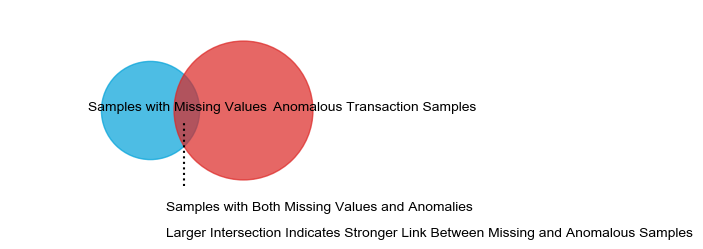

In [32]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Set font for English text
plt.rcParams['axes.unicode_minus'] = False   # Fix for negative number display issue

plt.figure(figsize=(5, 3), dpi=100)
plt.scatter(2.8, 5, s=5000, c="#01a2d9", alpha=0.7, label="Samples with Missing Values")
plt.scatter(4, 5, s=10000, c="#dc2624", alpha=0.7, label="Anomalous Transaction Samples")
plt.xlim(1, 6)
plt.ylim(2.5, 7)

# Customizing the axes appearance
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adding English text annotations
plt.text(2, 5, s="Samples with Missing Values", fontsize=10)
plt.text(4, 5, s="        Anomalous Transaction Samples", fontsize=10)
plt.vlines(3.25, 3.5, 4.8, colors="k", linestyles="dotted")
plt.text(3.015, 3, s="Samples with Both Missing Values and Anomalies", fontsize=10)
plt.text(3.015, 2.5, s="Larger Intersection Indicates Stronger Link Between Missing and Anomalous Samples", fontsize=10)

# Removing tick marks
plt.xticks([])
plt.yticks([])

# Uncomment the following line to display the plot in an interactive environment like Jupyter Notebook
# plt.show()


In [ ]:
#inspect the proportion of the intersection to missing value in 'cat'

In [33]:

data.loc[data["cat"].isnull(),"abnormal_label"].sum()

163

In [34]:

data["cat"].isnull().sum()

1390

In [35]:
163/1390

0.11726618705035971

In [ ]:
#The proportion is low and it indicates samples with missing values are not necessarily all anomalies

In [ ]:
#Insepct the proportion of intersection to anomalous samples

In [ ]:

#If the proportion is high, we can't just delete it.

In [38]:
for i in ["cat","pro_brand"]:
    ratio1 = 100*data.loc[data[i].isnull(),"abnormal_label"].sum()/data[i].isnull().sum()
    print("the proportion of anomalous samples to missing values in '{}' is {:.3f}%".format(i,ratio1))

the proportion of anomalous samples to missing values in 'cat' is 11.727%
the proportion of anomalous samples to missing values in 'pro_brand' is 20.984%


**Conclusion: a sample missing brand or product category can not be necessarily considered as anomaly transaction. There is no strong connection between missing values and anomaly transaction.**

In [40]:
for i in ["cat","pro_brand"]:
    ratio2 = 100*data.loc[data[i].isnull(),"abnormal_label"].sum()/(data["abnormal_label"]==1).sum()
    print("the proportion of missing value in '{}' to anomalous samples is {:.3f}%".format(i,ratio2))

the proportion of missing value in 'cat' to anomalous samples is 0.573%
the proportion of missing value in 'pro_brand' to anomalous samples is 0.569%


**Conclusion:In all anomalous samples, the proportion of missing value in 'cat' or 'pro_brand' is low.**

In [41]:
data.dropna(how="any",inplace=True) #delete all columns that contain missing values

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132761 entries, 1 to 134189
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        132761 non-null  int64  
 1   order_date      132761 non-null  object 
 2   order_time      132761 non-null  object 
 3   cat             132761 non-null  object 
 4   attribution     132761 non-null  object 
 5   pro_id          132761 non-null  int64  
 6   pro_brand       132761 non-null  object 
 7   total_money     132761 non-null  float64
 8   total_quantity  132761 non-null  int64  
 9   order_source    132761 non-null  object 
 10  pay_type        132761 non-null  object 
 11  user_id         132761 non-null  object 
 12  city            132761 non-null  object 
 13  abnormal_label  132761 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 15.2+ MB


In [43]:
data.index = range(data.shape[0])

In [44]:
data.shape[0]

132761

In [46]:
(data["abnormal_label"] == 1).sum()

28284

### Handling Duplicated Values

In [49]:
data["order_id"].duplicated().sum() 

18554

In [50]:
data.duplicated().sum()

8

In [51]:
data.drop_duplicates(inplace=True)

In [52]:
data.shape

(132753, 14)

In [53]:
data["order_id"].value_counts()

4279118253    32
4269390206    23
4271884108    20
4275856215    20
4265415474    19
              ..
4146667708     1
4146667654     1
4146661886     1
4146657953     1
4285770056     1
Name: order_id, Length: 114207, dtype: int64

In [54]:
data[data["order_id"] == 4279118253].head(10)

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
95213,4279118253,2013-07-23,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95214,4279118253,2013-11-08,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95215,4279118253,2013-01-26,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95216,4279118253,2013-02-03,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95217,4279118253,2013-07-06,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95218,4279118253,2013-04-28,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95219,4279118253,2013-10-04,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95220,4279118253,2013-02-21,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95221,4279118253,2013-06-18,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95222,4279118253,2013-09-25,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0


In [55]:
data[data["order_id"] == 4269390206].head(10)

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
76916,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0
76921,4269390206,2013-05-03,02:11:10,生活电器厨卫电器,GO,1000320932,凯伍德,1690.0,1,主站,合并支付,1390109546,西安市,0
76922,4269390206,2013-05-02,02:11:10,家居日用,GO,1000336076,康宁,439.0,1,主站,合并支付,1390109546,西安市,0
76923,4269390206,2013-12-19,02:11:10,家居日用,GO,1000192284,国研联合,158.0,1,主站,合并支付,1390109546,西安市,0
76924,4269390206,2013-10-28,02:11:10,家居日用,GO,1000104751,苏泊尔,459.0,1,主站,合并支付,1390109546,西安市,0
76925,4269390206,2013-12-05,02:11:10,家居日用,GO,1000104746,苏泊尔,229.0,1,主站,合并支付,1390109546,西安市,0


In [57]:
DupOrder = data["order_id"].value_counts().index
DupOrder

Int64Index([4279118253, 4269390206, 4271884108, 4275856215, 4265415474,
            4279551124, 4283874398, 4283873538, 4283874524, 4283339603,
            ...
            4146673872, 4146673733, 4146673535, 4146672339, 4146668187,
            4146667708, 4146667654, 4146661886, 4146657953, 4285770056],
           dtype='int64', length=114207)

In [58]:
for i in DupOrder[:30]:
    AbOrder = (data.loc[data["order_id"] == i,"abnormal_label"]==1).sum()
    print(i,":",AbOrder)

4279118253 : 0
4269390206 : 0
4271884108 : 20
4275856215 : 20
4265415474 : 0
4279551124 : 0
4283874398 : 0
4283873538 : 0
4283874524 : 0
4283339603 : 0
4283874688 : 0
4283874209 : 0
4283873946 : 0
4283339890 : 0
4283339774 : 0
4283336310 : 0
4276167340 : 0
4282842130 : 0
4282842151 : 0
4282842230 : 0
4193043860 : 16
4282512627 : 0
4282842193 : 0
4272509367 : 0
4282513806 : 0
4282513764 : 0
4282561933 : 0
4285070202 : 0
4280659906 : 0
4285070300 : 0


In [60]:
data[data["order_id"] == 4271884108]

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
3980,4271884108,2013-04-30,09:41:31,服饰鞋帽,POP,8002089657,PPZ,178.0,2,手机站点,合并支付,gome_taozx,广州市,1
3981,4271884108,2013-10-09,09:41:31,服饰鞋帽,POP,8000345913,漫路,176.0,2,手机站点,合并支付,gome_taozx,广州市,1
15817,4271884108,2013-09-06,09:41:31,服饰鞋帽,POP,8002287340,jstfe,49.0,1,手机站点,合并支付,gome_taozx,广州市,1
15818,4271884108,2013-09-30,09:41:31,服饰鞋帽,POP,8002287341,jstfe,49.0,1,手机站点,合并支付,gome_taozx,广州市,1
15819,4271884108,2013-09-16,09:41:31,服饰鞋帽,POP,8002206973,梵利玛,109.0,1,手机站点,合并支付,gome_taozx,广州市,1
15820,4271884108,2013-07-27,09:41:31,服饰鞋帽,POP,8002206218,唐狮,199.0,1,手机站点,合并支付,gome_taozx,广州市,1
15821,4271884108,2013-01-28,09:41:31,服饰鞋帽,POP,8002094791,SUCK-II,139.0,1,手机站点,合并支付,gome_taozx,广州市,1
15822,4271884108,2013-03-30,09:41:31,服饰鞋帽,POP,8002093564,占姆士,129.0,1,手机站点,合并支付,gome_taozx,广州市,1
15823,4271884108,2013-12-10,09:41:31,服饰鞋帽,POP,8002161945,占姆士,119.0,1,手机站点,合并支付,gome_taozx,广州市,1
15824,4271884108,2013-11-30,09:41:31,服饰鞋帽,POP,8002093298,骑士保罗,79.0,1,手机站点,合并支付,gome_taozx,广州市,1


In [61]:
#Do they have different pro_id on the same order_id?
data.loc[data["order_id"] == 4271884108,"pro_id"].duplicated().sum()

0

In [63]:
data[data["order_id"] == 4193043860]

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
1118,4193043860,2013-06-23,22:50:54,生活电器厨卫电器,POP,8000325989,飞利浦,690.0,5,主站,合并支付,ye519888,惠州市,1
3794,4193043860,2013-07-19,22:50:54,生活电器厨卫电器,GO,1000365248,飞利浦,334.0,2,主站,合并支付,ye519888,惠州市,1
11939,4193043860,2013-01-05,22:50:54,手机摄影数码,GO,1000366925,华为,2288.0,1,主站,合并支付,ye519888,惠州市,1
11940,4193043860,2013-02-02,22:50:54,生活电器厨卫电器,GO,1000308290,奔腾,68.0,1,主站,合并支付,ye519888,惠州市,1
11941,4193043860,2013-08-27,22:50:54,生活电器厨卫电器,GO,1000310218,飞利浦,228.0,1,主站,合并支付,ye519888,惠州市,1
11942,4193043860,2013-11-02,22:50:54,生活电器厨卫电器,GO,1000338760,奔腾,99.0,1,主站,合并支付,ye519888,惠州市,1
11943,4193043860,2013-12-05,22:50:54,生活电器厨卫电器,GO,1000365247,飞利浦,129.0,1,主站,合并支付,ye519888,惠州市,1
11944,4193043860,2013-11-03,22:50:54,电脑办公打印文仪,GO,1000115820,摩天手,29.0,1,主站,合并支付,ye519888,惠州市,1
11945,4193043860,2013-08-07,22:50:54,箱包奢品,POP,8001244945,TEEMZONE,159.0,1,主站,合并支付,ye519888,惠州市,1
11946,4193043860,2013-01-10,22:50:54,服饰鞋帽,POP,8001649376,麦高,59.0,1,主站,合并支付,ye519888,惠州市,1


In [64]:
data.loc[data["order_id"] == 4193043860,"pro_id"].duplicated().sum()

0


- There are different 'order_date' with the same 'order_time' on the same order_id. Most of 'order_date' are forged.
- For the anomaly samples, the 'pro_id' are all different on the same order_id. This indicates that although the 'order_time' of the anomaly sample is also forged, the sample itself is not forged.

In [68]:
(data["abnormal_label"] == 1).sum()

28284

In [69]:
data2 = data.drop(columns="order_date")

In [73]:
data2.duplicated().sum() #the size of forged data is small

1471

In [74]:
#find the index of duplicated samples, and delete them

In [75]:
data.drop(index=data[data2.duplicated()].index,inplace=True)

/var/folders/6r/w39cs75945v35_75hhr9_2nw0000gn/T/ipykernel_37409/3209526103.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(index=data[data2.duplicated()].index,inplace=True)


In [76]:
data["order_id"].value_counts()

4269390206    23
4271884108    20
4275856215    20
4265415474    19
4283874688    18
              ..
4144311846     1
4283495517     1
4283496150     1
4144240046     1
4285770056     1
Name: order_id, Length: 114207, dtype: int64

In [79]:
data[data["order_id"] == 4269390206].head()

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
76916,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0


In [80]:
data.index = range(data.shape[0])

In [81]:
(data["abnormal_label"] == 1).sum()

28284

In [89]:

data.loc[data["abnormal_label"]==1,"order_id"].value_counts()

4271884108    20
4275856215    20
4193043860    16
4272902282    15
4263198458    14
              ..
4275725286     1
4275725271     1
4275725244     1
4275725191     1
4285735014     1
Name: order_id, Length: 25107, dtype: int64

In [90]:
(data["order_id"] == 4271884108).sum()

20

In [91]:
data[data["order_id"] == 4271884108].shape[0]

20

In [92]:
data.loc[data["order_id"] == 4263198458,"abnormal_label"]

1560     1
3931     1
3932     1
14800    1
14801    1
14802    1
14803    1
14804    1
14805    1
14806    1
14807    1
14808    1
14809    1
14810    1
Name: abnormal_label, dtype: int64

In [93]:
data.loc[data["abnormal_label"]!=1,"order_id"].value_counts()

4269390206    23
4265415474    19
4283339603    18
4283874209    18
4283339890    18
              ..
4203261483     1
4203261361     1
4203261263     1
4203261137     1
4285770056     1
Name: order_id, Length: 89105, dtype: int64

In [94]:
data.loc[data["order_id"] == 4269390206,"abnormal_label"].sum()

0

In [95]:
label_1 = data.loc[data["abnormal_label"]==1,"order_id"].value_counts()

In [96]:
label_1

4271884108    20
4275856215    20
4193043860    16
4272902282    15
4263198458    14
              ..
4275725286     1
4275725271     1
4275725244     1
4275725191     1
4285735014     1
Name: order_id, Length: 25107, dtype: int64

In [97]:
label_1.index

Int64Index([4271884108, 4275856215, 4193043860, 4272902282, 4263198458,
            4281345265, 4279735193, 4278223689, 4282015346, 4281811657,
            ...
            4275725467, 4275725368, 4275725356, 4275725347, 4275725322,
            4275725286, 4275725271, 4275725244, 4275725191, 4285735014],
           dtype='int64', length=25107)

In [98]:
###=====【TIME WARNING: 3mins】=====###
df = pd.DataFrame()
for idx,i in enumerate(label_1.index):
    ratio = label_1[i]/data[data["order_id"] == i].shape[0]
    df.loc[idx,"order_id"] = i
    df.loc[idx,"the proportion of anomaly samples to all samples under the same order_id"] = ratio
    #the proportion of anomaly samples to all samples under the same order_id

In [99]:
df["the proportion of anomaly samples to all samples under the same order_id"].value_counts()

1.0    25102
0.5        5
Name: the proportion of anomaly samples to all samples under the same order_id, dtype: int64

**Labels of all samples under the same order_id are the same.**

In [101]:
data["order_date"].apply(lambda x: x[5:7])#extract month

0         09
1         09
2         04
3         03
4         04
          ..
131277    03
131278    01
131279    03
131280    09
131281    05
Name: order_date, Length: 131282, dtype: object

In [102]:
#check the distribution of transaction volume per month
OrderMonth = data["order_date"].apply(lambda x: x[5:7])
OrderMonth.value_counts()

10    11651
06    11201
09    11124
03    11113
07    11011
01    10959
04    10912
05    10888
12    10842
08    10837
11    10723
02    10021
Name: order_date, dtype: int64

In [103]:
data.drop(columns="order_date",inplace=True)
#drop 'order_date' column

In [104]:
data.shape

(131282, 13)

### Handling Outliers

- Continuous Data


In [105]:
data.loc[:,["total_money","total_quantity"]]

,total_money,total_quantity
0,766000.0,200
1,19900.0,100
2,100.0,100
3,990.0,100
4,8800.0,100
...,...,...
131277,2765.0,1
131278,2672.0,1
131279,128.0,1
131280,79.0,1


In [106]:
data.loc[:,["total_money","total_quantity"]].describe() #数据左偏

,total_money,total_quantity
count,131282.000000,131282.000000
mean,667.187834,1.188975
std,2930.730828,1.684653
min,0.500000,1.000000
25%,29.000000,1.000000
50%,98.000000,1.000000
75%,379.000000,1.000000
max,766000.000000,200.000000


确认没有小于0的业务上不该出现的异常值，从分布来看两个连续型变量都可能出现大量的异常。

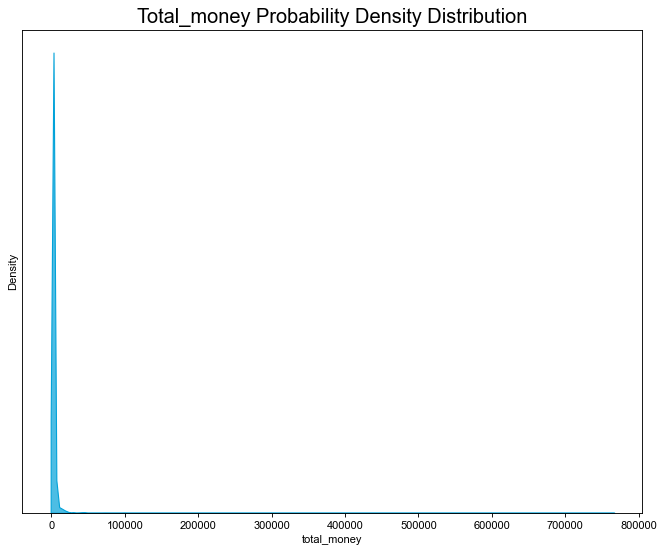

In [107]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False   
plt.figure(figsize=(10, 8), dpi=80)

sns.kdeplot(data.loc[:, "total_money"],
            shade=True,
            color="#01a2d9",
            label="total_money",
            alpha=.7)

sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("Total_money Probability Density Distribution",fontsize=18)
plt.yticks([])
#plt.xlim((-10000,100000))
#plt.xlim((-1,10000))
plt.show()

findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.


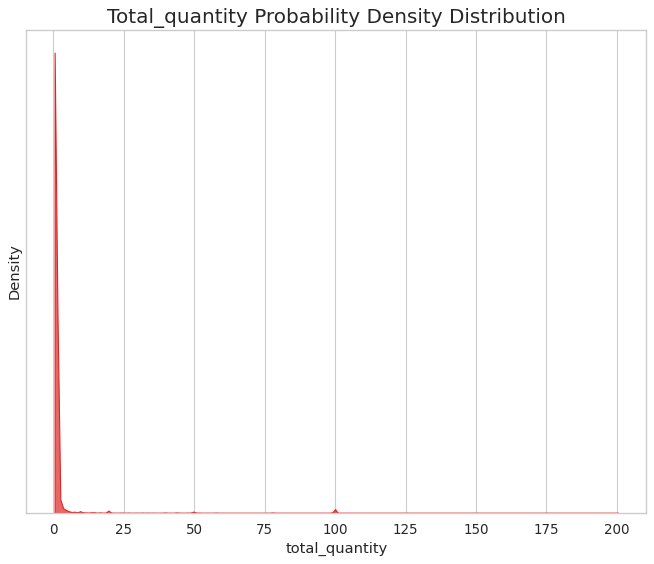

In [108]:
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(data.loc[:, "total_quantity"],
            shade=True,
            color="#dc2624",
            label="total_quantity",
            alpha=.7)
#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("Total_quantity Probability Density Distribution",fontsize=18)
plt.yticks([])
#plt.xlim((-1,20))
#plt.xlim((-1,5))
plt.show()

- Inspect outliers：boxplot
> [QL-1.5\*IQR, QU+1.5*IQR]


In [109]:
NumOfSamples = data.shape[0]
DataNoAbnormal = data.copy()
BoxAbnormalIdx = [] 
for idx,column in enumerate(["total_money","total_quantity"]):
    feature = data.loc[:,column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL
    error = feature[((feature < (QL - 1.5*IQR)).astype(int) + (feature > (QU + 1.5*IQR)).astype(int)) != 0]
    BoxAbnormalIdx.extend(error.index)

In [110]:
len(BoxAbnormalIdx)

31266

In [111]:
BoxAbnormalIdx = set(BoxAbnormalIdx) #using set to remove duplicates

In [128]:
len(BoxAbnormalIdx) #most samples have one abnormal feature

29949

In [129]:
len(BoxAbnormalIdx)/data.shape[0]

0.22812723754970216

In [112]:
(data.loc[BoxAbnormalIdx,"abnormal_label"] == 1).sum()

/var/folders/6r/w39cs75945v35_75hhr9_2nw0000gn/T/ipykernel_37409/2361160401.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  (data.loc[BoxAbnormalIdx,"abnormal_label"] == 1).sum()


7368

In [113]:
df = pd.DataFrame(index=data.index)

In [114]:
df

""
0
1
2
3
4
...
131277
131278
131279
131280


In [115]:
df["abnormal_feature"] = 0

In [116]:
df

,abnormal_feature
0,0
1,0
2,0
3,0
4,0
...,...
131277,0
131278,0
131279,0
131280,0


In [117]:
df.loc[BoxAbnormalIdx,"abnormal_feature"] = 1

/var/folders/6r/w39cs75945v35_75hhr9_2nw0000gn/T/ipykernel_37409/833598610.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.loc[BoxAbnormalIdx,"abnormal_feature"] = 1


In [118]:
df

,abnormal_feature
0,1
1,1
2,1
3,1
4,1
...,...
131277,1
131278,1
131279,0
131280,0


In [120]:
pd.concat([df["abnormal_feature"],data["abnormal_label"]],axis=1).corr()

,abnormal_feature,abnormal_label
abnormal_feature,1.000000,0.040428
abnormal_label,0.040428,1.000000


In [121]:
data.head()

,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0


In [122]:
data.to_csv(r'data\abnormal_order2.csv')